<a href="https://colab.research.google.com/github/mashdas/nlp_101/blob/master/sarcasmDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


In [0]:

import json


with open("/tmp/sarcasm.json") as f:
  datastore=json.load(f)

sentences,labels,urls=[],[],[]
for x in datastore:
  sentences.append(x["headline"])
  labels.append(x["is_sarcastic"])
  urls.append(x["article_link"])  

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index=tokenizer.word_index

In [58]:
word_index["and"]

9

In [19]:
sequences=tokenizer.texts_to_sequences(sentences)
padded=pad_sequences(sequences,padding="post")
print(padded.shape)

(26709, 40)


In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'


In [0]:
##Splitting test data and Training Data
t_size=20000
training_sentences=sentences[0:t_size]
testing_sentences=sentences[t_size:]
training_labels=labels[0:t_size]
testing_labels=labels[t_size:]

##Now,we also need to create a new vocabulary for the training sentences
tk=Tokenizer(num_words=vocab_size,oov_token="<OOV>")
tk.fit_on_texts(training_sentences)

In [0]:
w_index=tk.word_index


In [0]:
training_sequences = tk.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tk.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [0]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding,GlobalAveragePooling1D,Dense

In [0]:
model = tf.keras.Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [81]:
model.summary()
history = model.fit(training_padded, training_labels, epochs=30, validation_data=(testing_padded, testing_labels), verbose=2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
625/625 - 2s - loss: 0.6604 - accuracy: 0.5857 - val_loss: 0.5696 - val_accuracy: 0.6967
Epoch 2/30
625/625 - 2s - loss: 0.4158 - accuracy: 0.8354 - val_loss: 0.3775 - val_accuracy: 0.8423
Epoch 3/30
625/625 - 2s - loss: 0.3019 - accur

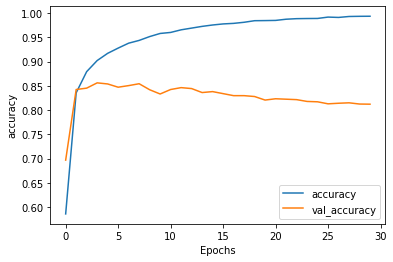

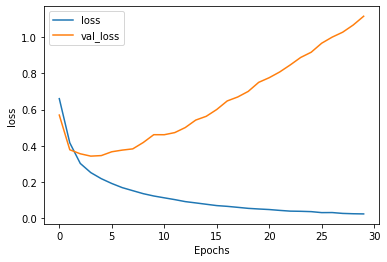

In [82]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [97]:
sentence = ["Yeah right, Bakshi cooks the best roasted chicken pie in the whole wide world", "game of thrones season finale showing this sunday night"]
sequences = tk.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.9620038e-01]
 [1.1032246e-05]]


In [0]:
##Should implement early stopping